In [23]:
# Lets start by converting book, rating users into the appropriate rows and cols.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint



DATA_CONTEXT = "movies"
VERSION = "2"
OUTPUT = "data"
# Load the data

products_df_original = pd.read_csv("../data/movies/movies_metadata.csv")
ratings_df_original = pd.read_csv("../data/movies/ratings.csv")

print("products len: ", len(products_df_original), "ratings len: ", len(ratings_df_original))

products_df_original.head()

C:\Users\wangn\AppData\Local\Temp\ipykernel_25768\275374147.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  products_df_original = pd.read_csv("../data/movies/movies_metadata.csv")


products len:  45466 ratings len:  26024289


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [24]:
products_df_original.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [25]:
# Convert as folllowing standarized format:
import json
"""

products:

| name           | type | description                               |
| -------------- | ---- | ----------------------------------------- |
| id             | str  | Unique identifier of the product          |
| product_title  | str  | Title of the product                      |
| product_image  | str  | Image of the product                      |
| product_price  | int  | Price of the product (if available)  |
| product_soup   | str  | All Aggregated Description of the product |
| product_tags   | str  | List of tags of the product, sep by comma |
| product_rate   | float| Rating of the product                    |

From:

(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

"""

def create_soup(row):
      message = ""
      try:
      # print(row["title"], row["overview"])
            if row["title"] != np.nan:
                  message += row["title"] + " "
            if row["overview"] != np.nan:
                  message += row["overview"] + " "
      except:
            pass      
      return message

products_books = products_df_original.copy()
products_books['product_id'] = products_books["id"]
products_books["product_title"] = products_books["original_title"]
products_books["product_image"] = np.nan
products_books["product_price"] = np.nan
products_books["product_soup"] = products_books.apply(create_soup, axis=1)
products_books["product_rate"] = products_books["vote_average"]

def add_tags(row):
      message = ""
      try:
            # "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"
            tags = row["genres"]
            # convert to JSON:
            tags = json.loads(tags.replace("'", "\""))
            for tag in tags:
                  message += tag["name"] + ", "
      except:
            pass            
      
      return message

products_books["product_tags"] = products_books.apply(add_tags, axis=1)


products_books = products_books[["product_id", "product_title", "product_image", "product_price", "product_soup", "product_tags", "product_rate"]]
products_books.head()

,product_id,product_title,product_image,product_price,product_soup,product_tags,product_rate
0,862,Toy Story,NaN,NaN,"Toy Story Led by Woody, Andy's toys live happi...","Animation, Comedy, Family,",7.7
1,8844,Jumanji,NaN,NaN,Jumanji When siblings Judy and Peter discover ...,"Adventure, Fantasy, Family,",6.9
2,15602,Grumpier Old Men,NaN,NaN,Grumpier Old Men A family wedding reignites th...,"Romance, Comedy,",6.5
3,31357,Waiting to Exhale,NaN,NaN,"Waiting to Exhale Cheated on, mistreated and s...","Comedy, Drama, Romance,",6.1
4,11862,Father of the Bride Part II,NaN,NaN,Father of the Bride Part II Just when George B...,"Comedy,",5.7


In [26]:
print(ratings_df_original.columns)
ratings_df_original.head()

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [27]:
# Convert Transactions as standarized format

"""
To: 
| name       | type | description                          |
| ---------- | ---- | ------------------------------------ |
| id         | str  | Unique identifier of the transaction |
| user_id    | str  | Unique identifier of the user        |
| product_id | str  | Unique identifier of the product     |
| rate       | int  | Positive association rating          |

From: ratings_df.columns
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

"""


transactions_products = ratings_df_original.copy()

# assign 1...n id to each transaction
start = 1
transactions_products["id"] = range(start, len(transactions_products) + start)
transactions_products["user_id"] = transactions_products["userId"]
transactions_products["product_id"] = transactions_products["movieId"]
transactions_products["rate"] = transactions_products["rating"]


transactions_products = transactions_products[["id", "user_id", "product_id", "rate"]]
# count distribution of ratings
# print(transactions_products.groupby("rate").count())
print(transactions_products["rate"].unique())

transactions_products.head()

[1.  4.5 5.  4.  3.5 2.5 0.5 3.  2.  1.5]


,id,user_id,product_id,rate
0,1,1,110,1.0
1,2,1,147,4.5
2,3,1,858,5.0
3,4,1,1221,5.0
4,5,1,1246,5.0


In [28]:

print(transactions_products['rate'].value_counts())

rate
4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: count, dtype: int64


In [29]:

# remove products where under x interactions in total.

# def remove_under_interactions(df, col_name, threshhold=10, upper_tresh_times=3):
#     # Find id of products where total aggregated mentions in transactiosn is less than 50.
#     counts = df[col_name].value_counts()
#     df = df[df[col_name].isin(counts[counts > threshhold].index)]
#     df = df[df[col_name].isin(counts[counts < threshhold*upper_tresh_times].index)]
#     return df


def remove_under_interactions(df, col_name, threshhold=10, upper_tresh_times=3, select_rand_users=500):
    # Find id of products where total aggregated mentions in transactiosn is less than 50.
    counts = df[col_name].value_counts()
    df = df[df[col_name].isin(counts[counts > threshhold].index)]
    
    return df



In [30]:
print(len(transactions_products))
print('unique products:', len(transactions_products["product_id"].unique()))
print('unique users:', len(transactions_products["user_id"].unique()))

transactions = transactions_products

26024289
unique products: 45115
unique users: 270896


In [31]:


def get_guaranteed_features(dataframe):
    # where features are guaranteed not  benull
    features = []
    for column in dataframe.columns:
        if not dataframe[column].isnull().any():
            features.append(column)
    return features

def clean_with_treshhold(user_treshhold, product_treshold, original_transactions, products, save_as_append="", verbose=False, users_df=None, products_df=None, limit_users=600):
    """
    Iteratively removes transactions until user and product transactions meet the criteria.
    """
    results_dict = {}

    prev_transaction_count = -1
    transactions = original_transactions
    
    if verbose:
        print('Start count of transactions', len(original_transactions))
        print("Unique books: ", len(transactions["product_id"].unique()))
        print("Unique users: ", len(transactions["user_id"].unique()))

    while(prev_transaction_count != len(transactions)):
        transactions = remove_under_interactions(transactions, "product_id", product_treshold)
        transactions = remove_under_interactions(transactions, "user_id", user_treshhold)
        prev_transaction_count = len(transactions)
    
    unique_userid = list(transactions["user_id"].unique())
    # get random select_rand_users
    random_users = np.random.choice(unique_userid, limit_users)
    transactions = transactions[transactions["user_id"].isin(random_users)]

    if verbose:
        print('final count of transactions', len(transactions) )
        print("Unique books: ", len(transactions["product_id"].unique()))
        print("Unique users: ", len(transactions["user_id"].unique()))
    
    # Products
    products = products[products["product_id"].isin(transactions["product_id"].unique())]
    
    
    # Save.
    if save_as_append != "":
        # sort products by times they appear at transactions
        # Count the times each product appears in transactions
        unique_name = f"{save_as_append}_v{VERSION}_t{user_treshhold}_p{product_treshold}"
        
        product_counts = transactions["product_id"].value_counts()
        
        
        # Create a new dataframe with products sorted by count
        sorted_products = product_counts.reset_index()
        sorted_products.columns = ['product_id', 'count']
        
        sorted_products['product_id'] = sorted_products['product_id'].astype(str)
        products['product_id'] = products['product_id'].astype(str)
        
        # Merge this with the original products dataframe to keep the order
        products_books = products.merge(sorted_products, on='product_id', how='left').sort_values(by='count', ascending=False)
        products_books['id'] = products_books['product_id']
        products_books.to_csv(f"../{OUTPUT}/products{unique_name}.csv", index=False)

        transactions_books = transactions.copy()
        transactions_books.to_csv(f"../{OUTPUT}/transactions{unique_name}.csv", index=False)

        product_features = get_guaranteed_features(products_books)
        transaction_features = get_guaranteed_features(transactions_books)
        
        results_dict = {
            "data_context": DATA_CONTEXT,
            "product_filepath": f"{OUTPUT}/products{unique_name}.csv",
            "transactions_filepath": f"{OUTPUT}/transactions{unique_name}.csv",
            "product_features": product_features,
            "transaction_features": transaction_features,
            "product_unique_count": len(products_books["product_id"].unique()), 
            "transaction_count": len(transactions_books),
            "unique_product_count": len(products_books),
            "unique_users": len(transactions["user_id"].unique()),
            "version": VERSION,
            "unique_name": unique_name
        }
        
        if users_df is not None:
            users = users_df[users_df["id"].isin(transactions["user_id"].unique())]
            users.to_csv(f"../{OUTPUT}/users{save_as_append}.csv", index=False)
            users_features = get_guaranteed_features(users)
            results_dict["user_filepath"] = f"{OUTPUT}/users{unique_name}.csv"
            results_dict["user_features"] = users_features
            results_dict["user_count"] = len(users)
            results_dict["user_unique_count"] = len(users["id"].unique())
            
        
    
    return (transactions, results_dict)



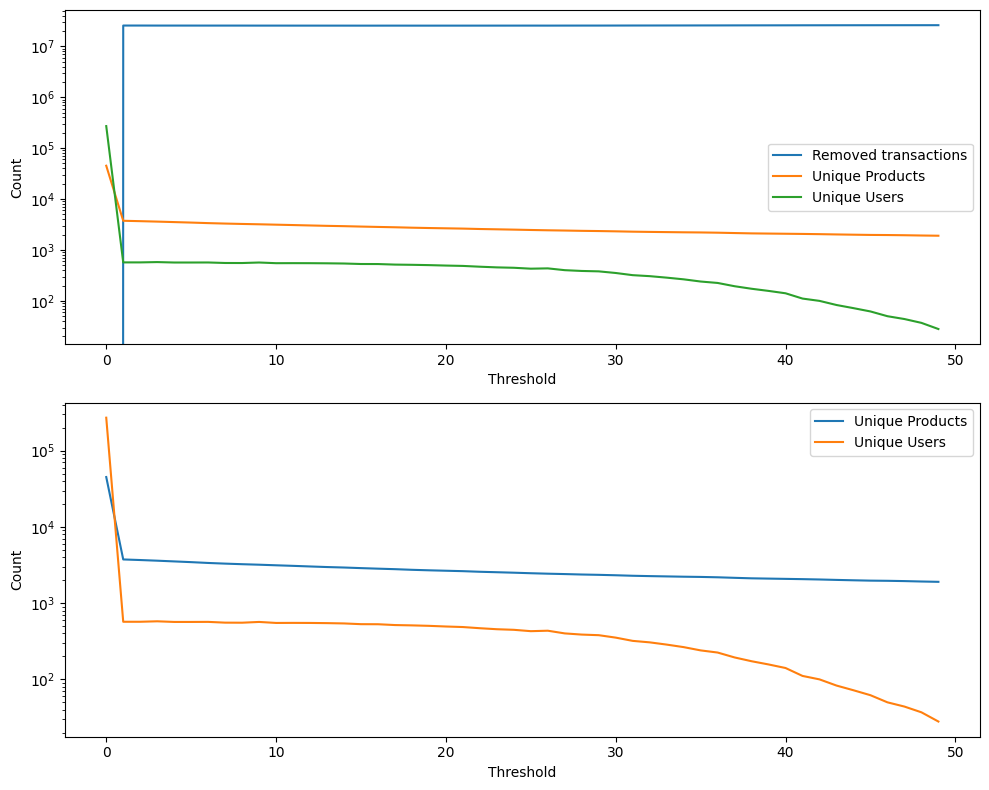

{50000: 1460, 100000: 1380}


In [32]:
# Chart how many books are removed if treshhold increases from 20 - 200 by 10

import matplotlib.pyplot as plt

removed_transactions = [0]
unique_books = [len(transactions_products["product_id"].unique())]
unique_products = [len(transactions_products["user_id"].unique())]
array_counts = []
MULTIPLIER_BOOKS = 2
save_hitting = {50000: None, 100000: None} #50 000 and 100 000
for i in range(500, 2000, 20):
    # user_treshhold, product_treshold, original_transactions, products, save_as_append=""):
    transactions, _ = clean_with_treshhold(i, i*MULTIPLIER_BOOKS, transactions_products, products_books)
    # print(i, len(transactions_books) - len(transactions)) 
    removed_transactions.append(len(transactions_products) - len(transactions))
    unique_books.append(len(transactions["product_id"].unique()))
    unique_products.append(len(transactions["user_id"].unique()))
    array_counts.append({"treshhold users": i, "treshhold products": i*MULTIPLIER_BOOKS, "transactions count": len(transactions), "removed_transactions": len(transactions_products) - len(transactions), "unique_products": len(transactions["product_id"].unique()), "unique_users": len(transactions["user_id"].unique() )})

    for key in save_hitting.keys():
        if len(transactions) < key and save_hitting[key] is None:
            save_hitting[key] = i
    # If all save hitting is found, break
    if all(value is not None for value in save_hitting.values()):
        break

# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the removed transactions, unique books, and unique users on the first subplot
ax1.plot(removed_transactions)
ax1.plot(unique_books)
ax1.plot(unique_products)

# Plot a closer look at unique books and unique users on the second subplot
ax2.plot(unique_books)
ax2.plot(unique_products)

# Set labels and legend
ax1.legend(["Removed transactions", "Unique Products", "Unique Users"])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Count")

ax2.legend(["Unique Products", "Unique Users"])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Count")


# Set y-axis to logarithmic scale
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# show dataframe.
df_counts = pd.DataFrame(array_counts)
df_counts.head(40)


pprint.pprint(save_hitting)

In [33]:
transactions_products['product_id'] = transactions_products['product_id'].astype(str)
products_books['product_id'] = products_books['product_id'].astype(str)

merged_df = transactions_products.merge(products_books, on='product_id', how='left')
merged_df.head()

,id,user_id,product_id,rate,product_title,product_image,product_price,product_soup,product_tags,product_rate
0,1,1,110,1.0,Trois couleurs : Rouge,NaN,NaN,Three Colors: Red Red This is the third film f...,"Drama, Mystery, Romance,",7.8
1,2,1,147,4.5,Les Quatre Cents Coups,NaN,NaN,The 400 Blows For young Parisian boy Antoine D...,"Drama,",8.0
2,3,1,858,5.0,Sleepless in Seattle,NaN,NaN,Sleepless in Seattle A young boy who tries to ...,"Comedy, Drama, Romance,",6.5
3,4,1,1221,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1246,5.0,Rocky Balboa,NaN,NaN,Rocky Balboa When he loses a highly publicized...,"Drama,",6.5


In [34]:


DATA_CONTEXT = "movies"
VERSION = "3"
OUTPUT = "data"
# def clean_with_treshhold(user_treshhold, product_treshold, original_transactions, products, save_as_append="", verbose=False, users_df=None, products_df=None):
transactions, results_dict = clean_with_treshhold(25, 50, transactions_products, products_books, save_as_append=f"_{DATA_CONTEXT}", verbose=True)
pprint.pprint(results_dict)

Start count of transactions 26024289
Unique books:  45115
Unique users:  270896
final count of transactions 92774
Unique books:  7936
Unique users:  598
{'data_context': 'movies',
 'product_features': ['product_id',
                      'product_title',
                      'product_soup',
                      'product_tags',
                      'product_rate',
                      'count',
                      'id'],
 'product_filepath': 'data/products_movies_v3_t25_p50.csv',
 'product_unique_count': 2563,
 'transaction_count': 92774,
 'transaction_features': ['id', 'user_id', 'product_id', 'rate'],
 'transactions_filepath': 'data/transactions_movies_v3_t25_p50.csv',
 'unique_name': '_movies_v3_t25_p50',
 'unique_product_count': 2564,
 'unique_users': 598,
 'version': '3'}


C:\Users\wangn\AppData\Local\Temp\ipykernel_25768\2305010245.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_id'] = products['product_id'].astype(str)


In [35]:


DATA_CONTEXT = "movies"
VERSION = "3"
OUTPUT = "data"
# def clean_with_treshhold(user_treshhold, product_treshold, original_transactions, products, save_as_append="", verbose=False, users_df=None, products_df=None):
transactions, results_dict = clean_with_treshhold(100, 100*2, transactions_products, products_books, save_as_append=f"_{DATA_CONTEXT}", verbose=True)
pprint.pprint(results_dict)

Start count of transactions 26024289
Unique books:  45115
Unique users:  270896
final count of transactions 175515
Unique books:  7483
Unique users:  597


C:\Users\wangn\AppData\Local\Temp\ipykernel_25768\2305010245.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_id'] = products['product_id'].astype(str)


{'data_context': 'movies',
 'product_features': ['product_id',
                      'product_title',
                      'product_soup',
                      'product_tags',
                      'product_rate',
                      'count',
                      'id'],
 'product_filepath': 'data/products_movies_v3_t100_p200.csv',
 'product_unique_count': 2392,
 'transaction_count': 175515,
 'transaction_features': ['id', 'user_id', 'product_id', 'rate'],
 'transactions_filepath': 'data/transactions_movies_v3_t100_p200.csv',
 'unique_name': '_movies_v3_t100_p200',
 'unique_product_count': 2393,
 'unique_users': 597,
 'version': '3'}


In [36]:


DATA_CONTEXT = "movies"
VERSION = "4"
OUTPUT = "data"
# def clean_with_treshhold(user_treshhold, product_treshold, original_transactions, products, save_as_append="", verbose=False, users_df=None, products_df=None):
transactions, results_dict = clean_with_treshhold(100, 100*2, transactions_products, products_books, save_as_append=f"_{DATA_CONTEXT}", verbose=True)

pprint.pprint(results_dict)

Start count of transactions 26024289
Unique books:  45115
Unique users:  270896
final count of transactions 179759
Unique books:  7547
Unique users:  599


C:\Users\wangn\AppData\Local\Temp\ipykernel_25768\2305010245.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_id'] = products['product_id'].astype(str)


{'data_context': 'movies',
 'product_features': ['product_id',
                      'product_title',
                      'product_soup',
                      'product_tags',
                      'product_rate',
                      'count',
                      'id'],
 'product_filepath': 'data/products_movies_v4_t100_p200.csv',
 'product_unique_count': 2411,
 'transaction_count': 179759,
 'transaction_features': ['id', 'user_id', 'product_id', 'rate'],
 'transactions_filepath': 'data/transactions_movies_v4_t100_p200.csv',
 'unique_name': '_movies_v4_t100_p200',
 'unique_product_count': 2412,
 'unique_users': 599,
 'version': '4'}
